In [1]:
# coding: utf-8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置图片可显示中文
plt.rcParams['font.sans-serif'].insert(0, 'SimHei')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 读取训练数据并粗略观察
train_data = pd.read_csv('./data/used_car_train_20200313.csv', sep=' ')
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# 150000条
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

### 数据预处理

In [5]:
# 删除有空值的行（由于数据体量足够，暂不考虑对空值进行回归模型填充）
train_data.dropna(inplace=True)

In [6]:
train_data.shape
# 删除后还有135884条

(135884, 31)

In [7]:
# train_data.set_index('SaleID', inplace=True)
train_data.reset_index(inplace=True)

In [8]:
# 日期类型数据处理，提取年月日
train_data['regDate_year'] = train_data['regDate'].astype('str').apply(lambda x: int(x[0:4]))
train_data['regDate_month'] = train_data['regDate'].astype('str').apply(lambda x: int(x[4:6]))
train_data['regDate_day'] = train_data['regDate'].astype('str').apply(lambda x: int(x[6:]))

train_data['creatDate_year'] = train_data['creatDate'].astype('str').apply(lambda x: int(x[0:4]))
train_data['creatDate_month'] = train_data['creatDate'].astype('str').apply(lambda x: int(x[4:6]))
train_data['creatDate_day'] = train_data['creatDate'].astype('str').apply(lambda x: int(x[6:]))

train_data

,index,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regDate_year,regDate_month,regDate_day,creatDate_year,creatDate_month,creatDate_day
0,0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,2004,4,2,2016,4,4
1,1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,2003,3,1,2016,3,9
2,2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,2004,4,3,2016,4,2
3,3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,1996,9,8,2016,3,12
4,4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,2012,1,3,2016,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135879,149995,149995,163978,20000607,121.0,10,4.0,0.0,1.0,163,15.0,0.0,4576,0,0,20160327,5900,45.316543,-3.139095,-1.269707,-0.736609,-1.505820,0.280264,0.000310,0.048441,0.071158,0.019174,1.988114,-2.983973,0.589167,-1.304370,-0.302592,2000,6,7,2016,3,27
135880,149996,149996,184535,20091102,116.0,11,0.0,0.0,0.0,125,10.0,0.0,2826,0,0,20160312,9500,45.972058,-3.143764,-0.023523,-2.366699,0.698012,0.253217,0.000777,0.084079,0.099681,0.079371,1.839166,-2.774615,2.553994,0.924196,-0.272160,2009,11,2,2016,3,12
135881,149997,149997,147587,20101003,60.0,11,1.0,1.0,0.0,90,6.0,0.0,3302,0,0,20160328,7500,44.733481,-3.105721,0.595454,-2.279091,1.423661,0.233353,0.000705,0.118872,0.100118,0.097914,2.439812,-1.630677,2.290197,1.891922,0.414931,2010,10,3,2016,3,28
135882,149998,149998,45907,20060312,34.0,10,3.0,1.0,0.0,156,15.0,0.0,1877,0,0,20160401,4999,45.658634,-3.204785,-0.441680,-1.179812,0.620680,0.256369,0.000252,0.081479,0.083558,0.081498,2.075380,-2.633719,1.414937,0.431981,-1.659014,2006,3,12,2016,4,1


In [14]:
train_data.notRepairedDamage.unique()

array(['0.0', '-', '1.0'], dtype=object)

In [15]:
# notRepairedDamage字段有-也属于空值，替换为空值后进行删除
train_data.notRepairedDamage.replace('-', np.nan, inplace=True)

In [16]:
train_data.dropna(inplace=True)

In [17]:
train_data.notRepairedDamage.replace(['0.0','1.0'], [0, 1], inplace=True)

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118326 entries, 0 to 135883
Data columns (total 38 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              118326 non-null  int64  
 1   SaleID             118326 non-null  int64  
 2   name               118326 non-null  int64  
 3   regDate            118326 non-null  int64  
 4   model              118326 non-null  float64
 5   brand              118326 non-null  int64  
 6   bodyType           118326 non-null  float64
 7   fuelType           118326 non-null  float64
 8   gearbox            118326 non-null  float64
 9   power              118326 non-null  int64  
 10  kilometer          118326 non-null  float64
 11  notRepairedDamage  118326 non-null  int64  
 12  regionCode         118326 non-null  int64  
 13  seller             118326 non-null  int64  
 14  offerType          118326 non-null  int64  
 15  creatDate          118326 non-null  int64  
 16  pr

In [19]:
feature_cols = [col for col in train_data.columns if col not in ['SaleID','price','regDate','creatDate']]
feature_data = train_data[feature_cols]
label_data = train_data['price']

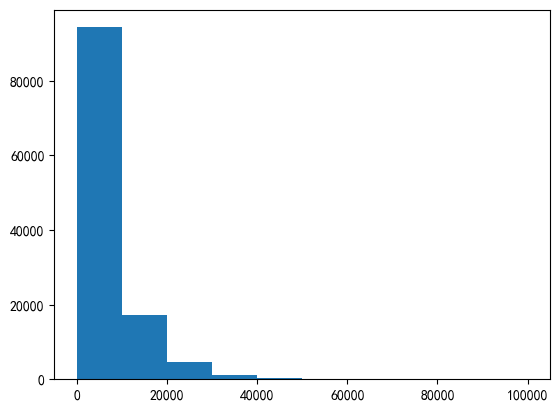

In [20]:
plt.hist(label_data)
plt.show()
plt.close()

In [ ]:
# %pip install sklearn lightgbm xgboost seaborn scipy IPython

In [21]:
import seaborn as sns
from scipy.special import jn
from IPython.display import display, clear_output
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
 
# 数据降维处理的
from sklearn.decomposition import PCA,FastICA,FactorAnalysis,SparsePCA
 
import lightgbm as lgb
import xgboost as xgb
 
# 参数搜索和评价的
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [22]:
# xgb模型搭建
xgb_model = xgb.XGBRegressor(
    n_estimators=1600, 
    learning_rate=0.05, 
    gamma=0, 
    subsample=0.8,
    colsample_bytree=0.8,
    max_depth=12
)

In [23]:
scores_train = []
scores = []

sk = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for train_ind, val_ind in sk.split(feature_data, label_data):
    
    train_x = feature_data.iloc[train_ind].values
    train_y = label_data.iloc[train_ind]
    val_x = feature_data.iloc[val_ind].values
    val_y = label_data.iloc[val_ind]
    
    xgb_model.fit(train_x, train_y)
    pred_train_xgb = xgb_model.predict(train_x)
    pred_xgb = xgb_model.predict(val_x)
    
    score_train = mean_absolute_error(train_y, pred_train_xgb)
    scores_train.append(score_train)
    score = mean_absolute_error(val_y, pred_xgb)
    scores.append(score)
print('Train mae:', np.mean(score_train))
print('Val mae', np.mean(scores))

D:\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Train mae: 32.39057765875762
Val mae 586.9029250125756


In [24]:
# 建立xgb训练模型
def build_model_xgb(x_train, y_train):
    model = xgb.XGBRegressor(
        n_estimators=1600, 
        learning_rate=0.05, 
        gamma=0, 
        subsample=0.8,
        colsample_bytree=0.8, 
        max_depth=12
    )
    model.fit(x_train, y_train)
    return model

In [25]:
# 建立lgb训练模型
def build_model_lgb(x_train, y_train):
    estimator = lgb.LGBMRegressor(num_leaves=127,n_estimators = 1600)
    param_grid = {
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
    }
    gbm = GridSearchCV(estimator, param_grid)
    gbm.fit(x_train, y_train)
    return gbm

In [26]:
x_train, x_val, y_train, y_val = train_test_split(feature_data, label_data, test_size = 0.2)

In [27]:
print('Train lgb...')
model_lgb = build_model_lgb(x_train, y_train)
val_lgb = model_lgb.predict(x_val)
MAE_lgb = mean_absolute_error(y_val, val_lgb)
print('MAE of val with lgb:', MAE_lgb)

Train lgb...
MAE of val with lgb: 597.5156081667911


In [28]:
print('Train xgb...')
model_xgb = build_model_xgb(x_train, y_train)
val_xgb = model_xgb.predict(x_val)
MAE_xgb = mean_absolute_error(y_val, val_xgb)
print('MAE of val with xgb:', MAE_xgb)

Train xgb...
MAE of val with xgb: 596.640252602047


In [30]:
# 这里我们采取了简单的加权融合的方式
val_Weighted = (1 - MAE_lgb / (MAE_xgb + MAE_lgb)) * val_lgb + (1 - MAE_xgb / (MAE_xgb + MAE_lgb)) * val_xgb
val_Weighted[val_Weighted < 0] = 10 
print('MAE of val with Weighted ensemble:', mean_absolute_error(y_val, val_Weighted))

MAE of val with Weighted ensemble: 577.4235785183689


In [32]:
testb_data = pd.read_csv('./data/used_car_testB_20200421.csv', sep=' ')
testb_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,-,5564,0,0,20160309,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


In [33]:
testb_data['regDate_year'] = testb_data['regDate'].astype('str').apply(lambda x: int(x[0:4]))
testb_data['regDate_month'] = testb_data['regDate'].astype('str').apply(lambda x: int(x[4:6]))
testb_data['regDate_day'] = testb_data['regDate'].astype('str').apply(lambda x: int(x[6:]))

testb_data['creatDate_year'] = testb_data['creatDate'].astype('str').apply(lambda x: int(x[0:4]))
testb_data['creatDate_month'] = testb_data['creatDate'].astype('str').apply(lambda x: int(x[4:6]))
testb_data['creatDate_day'] = testb_data['creatDate'].astype('str').apply(lambda x: int(x[6:]))

testb_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,regDate_year,regDate_month,regDate_day,creatDate_year,creatDate_month,creatDate_day
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322,2000,5,1,2016,3,8
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542,1995,2,11,2016,3,10
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173,2009,6,6,2016,3,9
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610,2002,6,1,2016,3,14
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014,2003,3,1,2016,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,-,5564,0,0,20160309,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587,2004,10,5,2016,3,9
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221,2013,4,9,2016,3,23
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602,2004,12,11,2016,3,16
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379,2002,7,2,2016,3,27


In [37]:
testb_data.reset_index(inplace=True)

In [42]:
test_data = testb_data[feature_cols]

In [43]:
test_data = test_data.fillna(-1)

In [50]:
test_data.notRepairedDamage.replace(['0.0','-','1.0'], [0, 1, 1], inplace=True)

In [51]:
print('Predict lgb...')
model_lgb_pre = build_model_lgb(feature_data, label_data)
subA_lgb = model_lgb_pre.predict(test_data)
subA_lgb

Predict lgb...


array([1329.56479468, 1918.15370629, 7595.67403971, ..., 5682.4840597 ,
       4836.91464559, 5375.18035812])

In [52]:
print('Predict xgb...')
model_xgb_pre = build_model_xgb(feature_data, label_data)
subA_xgb = model_xgb_pre.predict(test_data)
subA_xgb

Predict xgb...


array([1225.1731, 1860.838 , 8286.836 , ..., 5764.9546, 4852.775 ,
       5838.8184], dtype=float32)

In [53]:
scores_Weighted = (1 - MAE_lgb / (MAE_xgb + MAE_lgb)) * subA_lgb + (1 - MAE_xgb / (MAE_xgb + MAE_lgb)) * subA_xgb

In [59]:
new_test_data = pd.read_csv('./data/used_car_testB_20200421.csv', sep=' ')
new_test_data

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,0.0,5019,0,0,20160308,42.142061,-3.094739,-0.721300,1.466344,1.009846,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,0.0,1505,0,0,20160310,43.907034,-3.244605,-0.766430,1.276718,-1.065338,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,-,1776,0,0,20160309,45.389665,3.372384,-0.965565,-2.447316,0.624268,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,0.0,26,0,0,20160314,42.788775,4.035052,-0.217403,1.708806,1.119165,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,0.0,738,0,0,20160306,43.670763,-3.135382,-1.134107,0.470315,0.134032,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,249995,111443,20041005,4.0,4,0.0,NaN,1.0,150,15.0,-,5564,0,0,20160309,46.321013,-3.304401,0.073363,-0.622359,-0.778349,0.263668,0.000292,0.141804,0.076393,0.039272,2.072901,-2.531869,1.716978,-1.063437,0.326587
49996,249996,152834,20130409,65.0,1,0.0,0.0,0.0,179,4.0,0.0,5220,0,0,20160323,48.086547,-3.318641,0.965881,-2.672160,0.357440,0.255310,0.000991,0.155868,0.108425,0.067841,1.358504,-3.290295,4.269809,0.140524,0.556221
49997,249997,132531,20041211,4.0,4,0.0,0.0,1.0,147,12.5,0.0,3795,0,0,20160316,46.145279,-3.305263,-0.015283,-0.288329,-0.687112,0.262933,0.000318,0.141872,0.071968,0.042966,2.165658,-2.417885,1.370612,-1.073133,0.270602
49998,249998,143405,20020702,40.0,1,4.0,0.0,1.0,176,15.0,0.0,61,0,0,20160327,45.507088,-3.197006,-1.141252,-0.434930,-1.845040,0.282106,0.000023,0.067483,0.067526,0.009006,2.030114,-2.939244,0.569078,-1.718245,0.316379


In [60]:
scores = pd.DataFrame()
scores['SaleID'] = new_test_data.SaleID
scores['price'] = scores_Weighted
scores.to_csv("./sample_lgb_xgb.csv", index=False)